In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('mode.chained_assignment', None)

In [3]:
df_a = pd.read_csv('groupA.txt', header = None)
df_a.columns = ['X','Y','Class']
print(df_a.describe())
df_a.head()

                 X            Y        Class
count  4000.000000  4000.000000  4000.000000
mean      5.499685   142.548211     0.500000
std       0.512226    12.927202     0.500063
min       4.653274   120.556487     0.000000
25%       5.000621   129.905447     0.000000
50%       5.483045   143.322690     0.500000
75%       6.002560   155.150031     1.000000
max       6.324108   165.692925     1.000000


,X,Y,Class
0,5.902690,153.389468,0
1,6.080165,149.538040,0
2,5.855379,150.903728,0
3,6.075475,154.077386,0
4,5.976990,158.264022,0


In [4]:
df_b = pd.read_csv('groupB.txt', header = None)
df_b.columns = ['X','Y','Class']
df_b.head()
print(df_b.describe())

                 X            Y        Class
count  4000.000000  4000.000000  4000.000000
mean      5.851324   145.040664     0.500000
std       0.179523     5.827764     0.500063
min       5.307474   130.279556     0.000000
25%       5.700070   140.046063     0.000000
50%       5.846893   144.913972     0.500000
75%       6.000146   150.063866     1.000000
max       6.338235   159.844399     1.000000


In [5]:
df_c = pd.read_csv('groupC.txt', header = None)
df_c.columns = ['X','Y','Class']
df_c.head()

,X,Y,Class
0,6.044565,152.213673,0
1,6.070798,147.165263,0
2,5.960693,146.427733,0
3,5.980587,149.284117,0
4,6.026399,150.089632,0


In [6]:
def normalize(df):
    xmin = df['X'].min()
    xmax = df['X'].max()
    ymin = df['Y'].min()
    ymax = df['Y'].max()
    df['X']=df['X'].apply(lambda x: (x-xmin)/(xmax-xmin))
    df['Y']=df['Y'].apply(lambda y: (y-ymin)/(ymax-ymin))

In [7]:
normalize(df_a)
normalize(df_b)
normalize(df_c)

In [8]:
def hard_activation(weights, x, gain):
    net = sum([x*y for x, y in zip(weights[:-1],x)]) + weights[len(weights)-1]
    if net < 0:
        return 0
    return 1

In [9]:
def update_weights(weights, learning_rate, output, desired, current_row):
    increment = [learning_rate * x * (desired-output) for x in current_row[:-1]]
    increment.append(learning_rate*(desired-output))
    updated = [x+y for x,y in zip(weights, increment)]
    return updated  

In [10]:
import math
def soft_activation(weights, x, gain):
    net = sum([x*y for x, y in zip(weights[:-1],x)]) + weights[len(weights)-1]
    return 1/(1+math.exp(-gain*net))  

In [11]:
import random
import sys
def train_perceptron(learning_rate, df, max_iterations, error_threshold, activation, gain =None):
    weights = [random.uniform(-.5,.5)] * (df.shape[1])
    print('Initial Weights: ', weights)
    for x in range(max_iterations):
        error = 0
        print('______________________________________________\n\nEpoch: ',x)
        for i in range(len(df)):
            current_point = df.iloc[i]
            output = activation(weights, current_point[['X','Y']].values,gain)
            weights = update_weights(weights, learning_rate, output, current_point['Class'],current_point)

            error += (current_point['Class']-output)**2
        print('Total Error: ',error)
        print('Weights: ',weights)
        if error <= error_threshold:
            return weights
    return weights


In [12]:
def error(df, x_list, y_list):
    x1 = x_list[0]
    x2 = x_list[1]
    y1 = y_list[0]
    y2 = y_list[1]
    m = (y2-y1)/(x2-x1)
    df['prediction'] = df.apply(lambda x: predict(x['X'], x['Y'], x1, y1, m),axis=1)
    df['tp'] = df.apply(lambda x: x['prediction'] == x['Class'] and x['Class'] == 1, axis = 1)
    df['tn'] = df.apply(lambda x: x['prediction'] == x['Class'] and x['Class'] == 0, axis = 1)
    df['fp'] = df.apply(lambda x: x['prediction'] != x['Class'] and x['Class'] == 0, axis = 1)
    df['fn'] = df.apply(lambda x: x['prediction'] != x['Class'] and x['Class'] == 1, axis = 1)
    tp,tn,fp,fn=sum(df['tp']), sum(df['tn']),sum(df['fp']),sum(df['fn'])
    return 1- ((tp+tn)/(tp+tn+fp+fn))

In [13]:
def predict(x_data, y_data, x_line, y_line, m):
    y_expected = m*(x_data-x_line) + y_line
    if y_expected < y_data:
        return 0
    return 1

In [14]:
def plotGraph(df,weights, group):
    x_plot = []
    y_plot = []
    x_plot.append(0)
    x_plot.append(1)
    y_plot.append(-weights[2]/weights[1])
    y_plot.append((-weights[2]-weights[0])/ weights[1])
    print('Error: %.4f%%' % (100.0*error(df, x_plot, y_plot)))
    color = ['blue','red']
    labels = ['Men','Women']
    for i in range(2):
        plt.scatter(df[df['Class'] == i]['X'].values,df[df['Class'] == i]['Y'].values, color = color[i],label = labels[i])
    plt.title('Height vs. Weight for Group ' +group)
    plt.xlabel('Height in Feet')
    plt.ylabel('Weight in Pounds')
    plt.legend(loc='upper right')
    plt.plot(x_plot, y_plot)

# Group A Perceptron Training

## Hard Activation 

### 75/25 Training/Testing Split

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_a, test_size=0.25)
weights = train_perceptron(.01, train, 5000, 10**-5, hard_activation,0.1)

Initial Weights:  [-0.051720520718073204, -0.051720520718073204, -0.051720520718073204]
______________________________________________

Epoch:  0
Total Error:  8.0
Weights:  [-0.03338669501084867, -0.03401276126699555, 0.028279479281926805]
______________________________________________

Epoch:  1
Total Error:  0.0
Weights:  [-0.03338669501084867, -0.03401276126699555, 0.028279479281926805]


Error: 0.0000%


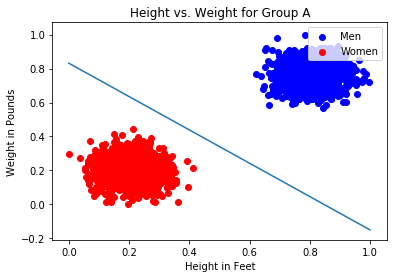

In [16]:
plotGraph(train,weights,"A",)

Error: 0.0000%


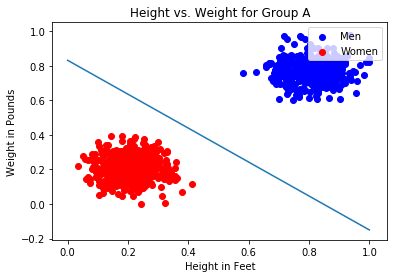

In [17]:
plotGraph(test, weights, "A")

### 25/75 Training/Testing Split

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_a, test_size=0.75)
weights = train_perceptron(.01, train, 5000, 10**-5, hard_activation,0.1)

Initial Weights:  [-0.22506702471961038, -0.22506702471961038, -0.22506702471961038]
______________________________________________

Epoch:  0
Total Error:  33.0
Weights:  [-0.15552915404859946, -0.14475638780289438, 0.10493297528038968]
______________________________________________

Epoch:  1
Total Error:  0.0
Weights:  [-0.15552915404859946, -0.14475638780289438, 0.10493297528038968]


Error: 0.0000%


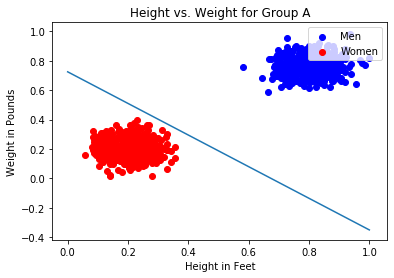

In [19]:
plotGraph(train, weights, "A")

Error: 0.0000%


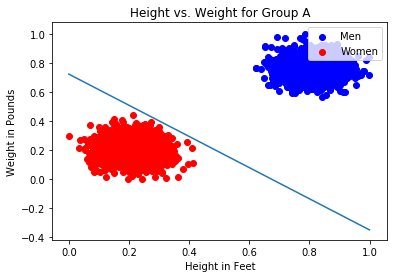

In [20]:
plotGraph(test, weights, "A")

## Soft Activation Function

### 75/25 Training/Testing Split

In [21]:
train, test = train_test_split(df_a, test_size=0.25)
weights = train_perceptron(15, train, 5000, 10**-5, soft_activation,2.75)

Initial Weights:  [0.021552464714867492, 0.021552464714867492, 0.021552464714867492]
______________________________________________

Epoch:  0
Total Error:  3.0608713645908323
Weights:  [-11.3118363367273, -11.071768524023787, 9.870344303751002]
______________________________________________

Epoch:  1
Total Error:  2.917222245297704e-06
Weights:  [-11.25449339430472, -11.007629921949528, 10.077390629734047]


Error: 0.0000%


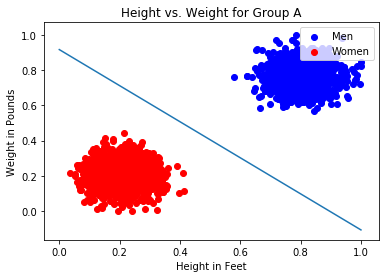

In [22]:
plotGraph(train, weights, "A")

Error: 0.0000%


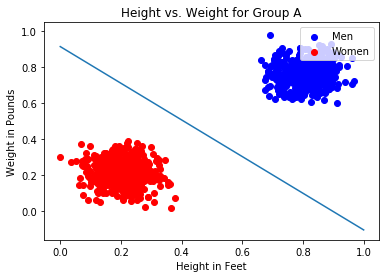

In [23]:
plotGraph(test, weights, "A")

### 25/75 Training/Testing Split

In [24]:
train, test = train_test_split(df_a, test_size=0.75)
weights = train_perceptron(15, train, 5000, 10**-5, soft_activation,2.75)

Initial Weights:  [-0.10690752662921343, -0.10690752662921343, -0.10690752662921343]
______________________________________________

Epoch:  0
Total Error:  3.1009715255079753
Weights:  [-9.468729345224123, -12.58410565092295, 10.179103739575178]
______________________________________________

Epoch:  1
Total Error:  8.863349293392232e-07
Weights:  [-9.458116459412919, -12.569224763869919, 10.223353535159946]


Error: 0.0000%


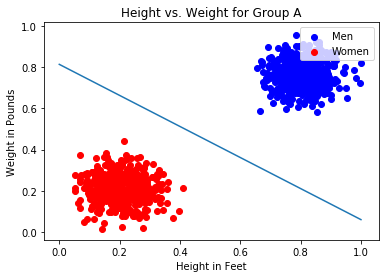

In [25]:
plotGraph(train, weights, "A")

Error: 0.0000%


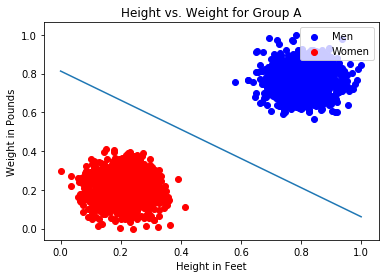

In [26]:
plotGraph(test, weights, "A")

# Group B Perceptron Training

## Hard Activation Function

### 75/25 Training/Testing Split

In [27]:
train, test = train_test_split(df_b, test_size=0.25)
weights = train_perceptron(.01, train, 5000, 100, hard_activation,0.1)


Initial Weights:  [0.1616474977465625, 0.1616474977465625, 0.1616474977465625]
______________________________________________

Epoch:  0
Total Error:  183.0
Weights:  [-0.05292358035187726, -0.06739559206726553, 0.05164749774656251]
______________________________________________

Epoch:  1
Total Error:  80.0
Weights:  [-0.06384140499625757, -0.0751068784414905, 0.07164749774656251]


Error: 1.2333%


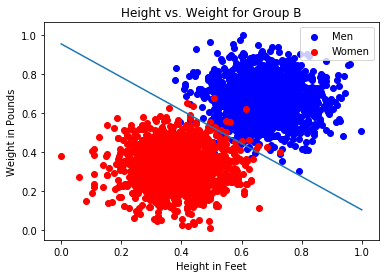

In [28]:
plotGraph(train,weights,"B")

Error: 1.2000%


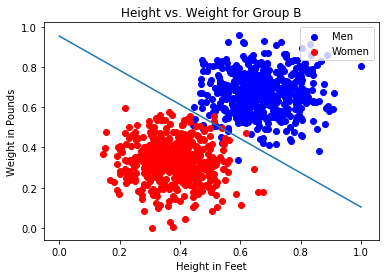

In [29]:
plotGraph(test, weights, "B")

### 25/75 Training/Testing Split

In [30]:
train, test = train_test_split(df_b, test_size=0.75)
weights = train_perceptron(.01, train, 5000, 100, hard_activation,0.1)

Initial Weights:  [-0.4235659605633454, -0.4235659605633454, -0.4235659605633454]
______________________________________________

Epoch:  0
Total Error:  75.0
Weights:  [-0.17867756258971854, -0.2087602465878034, 0.2064340394366549]


Error: 1.6000%


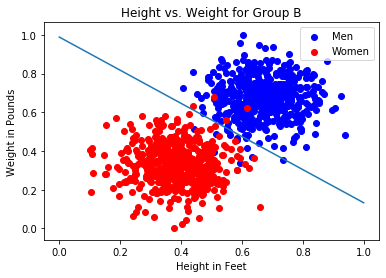

In [31]:
plotGraph(train,weights,"B")

Error: 1.6667%


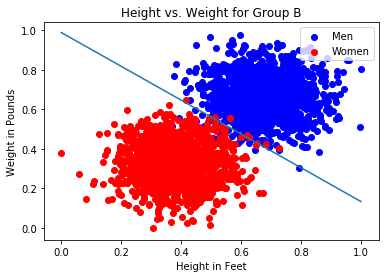

In [32]:
plotGraph(test,weights,"B")

## Soft Activation Function

### 75/25 Training/Testing Split

In [33]:
train, test = train_test_split(df_b, test_size=0.25)
weights = train_perceptron(10, train, 5000, 100, soft_activation,0.1)

Initial Weights:  [-0.30463719484674223, -0.30463719484674223, -0.30463719484674223]
______________________________________________

Epoch:  0
Total Error:  72.16391816090848
Weights:  [-145.17258080053037, -162.79862273922672, 162.49654984408525]


Error: 1.4333%


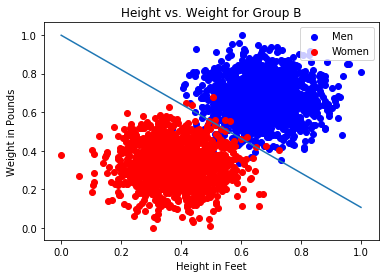

In [34]:
plotGraph(train, weights, "B")

Error: 1.3000%


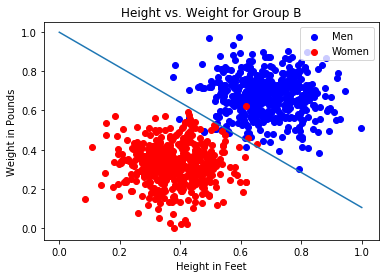

In [35]:
plotGraph(test, weights, "B")

### 25/75 Training/Testing Split

In [36]:
train, test = train_test_split(df_b, test_size=0.75)
weights = train_perceptron(10, train, 5000, 100, soft_activation,0.1)

Initial Weights:  [-0.048089960337320714, -0.048089960337320714, -0.048089960337320714]
______________________________________________

Epoch:  0
Total Error:  42.75320023937473
Weights:  [-98.83346841215337, -117.40698720507403, 112.96097712218778]


Error: 1.2000%


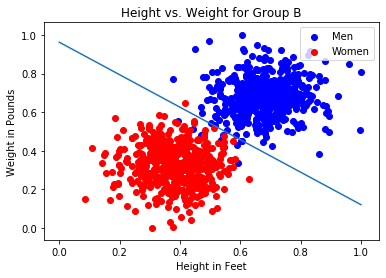

In [37]:
plotGraph(train, weights, "B")

Error: 1.4333%


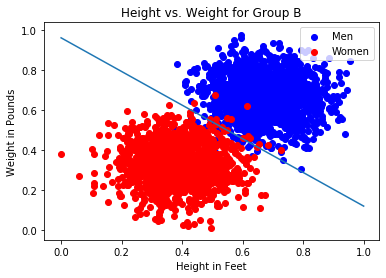

In [38]:
plotGraph(test, weights, "B")

# Group C Perceptron Training

## Hard Activation Function

### 75/25 Training/Testing Split

In [39]:
train, test = train_test_split(df_c, test_size=0.25)
weights = train_perceptron(.01, train, 5000, 1.45 * 10**3, hard_activation,0.1)

Initial Weights:  [0.06384457222471696, 0.06384457222471696, 0.06384457222471696]
______________________________________________

Epoch:  0
Total Error:  1133.0
Weights:  [-0.047872118562769475, -0.0273282663274018, 0.03384457222471695]


Error: 32.5996%


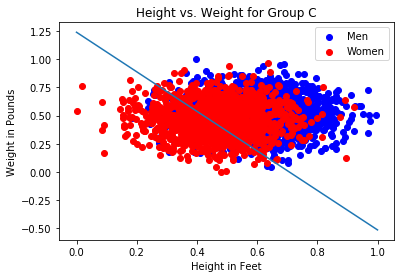

In [40]:
plotGraph(train, weights, "C")

Error: 31.2042%


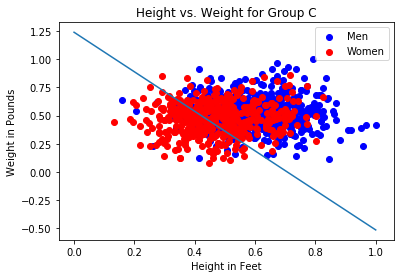

In [41]:
plotGraph(test, weights, "C")

### 25/75 Training/Testing Split

In [42]:
train, test = train_test_split(df_c, test_size=0.75)
weights = train_perceptron(.01, train, 5000, 1.45 * 10**3, hard_activation,0.1)

Initial Weights:  [0.08294315205878755, 0.08294315205878755, 0.08294315205878755]
______________________________________________

Epoch:  0
Total Error:  398.0
Weights:  [-0.05261921528192241, -0.016041961283709542, 0.022943152058787553]


Error: 41.6143%


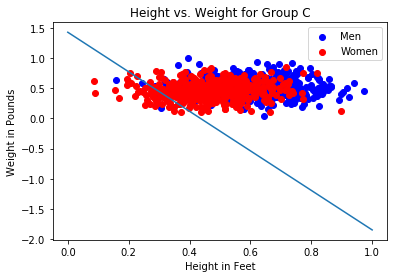

In [43]:
plotGraph(train, weights, "C")

Error: 44.5686%


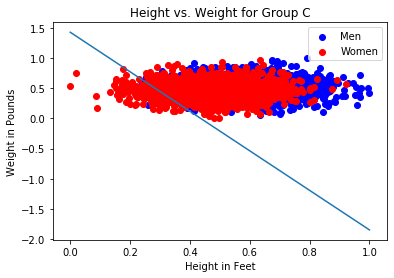

In [44]:
plotGraph(test, weights, "C")

## Soft Activation Function

### 75/25 Training/Testing Split

In [45]:
train, test = train_test_split(df_c, test_size=0.25)
weights = train_perceptron(.01, train, 5000, 1.45 * 10**3, soft_activation,10)

Initial Weights:  [-0.2515300199208179, -0.2515300199208179, -0.2515300199208179]
______________________________________________

Epoch:  0
Total Error:  622.3784444552524
Weights:  [-0.4833833027835245, -0.1526687365452875, 0.2814569864498489]


Error: 32.7393%


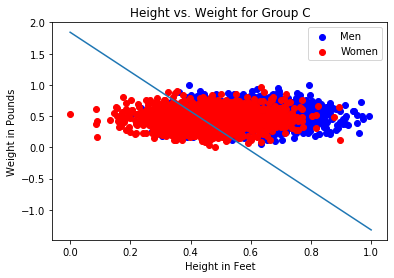

In [46]:
plotGraph(train, weights, "C")

Error: 32.9843%


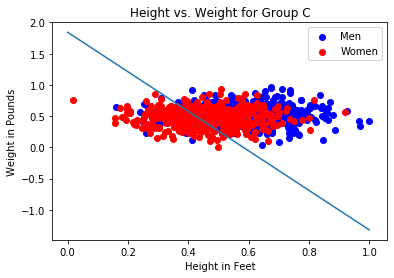

In [47]:
plotGraph(test, weights, "C")

### 25/75 Training/Testing Split

In [48]:
train, test = train_test_split(df_c, test_size=0.75)
weights = train_perceptron(.01, train, 5000, 1.45 * 10**3, soft_activation,10)

Initial Weights:  [-0.1861999739410759, -0.1861999739410759, -0.1861999739410759]
______________________________________________

Epoch:  0
Total Error:  225.98613262255205
Weights:  [-0.22139198698844403, -0.10550922961825088, 0.19716388811672256]


Error: 36.5828%


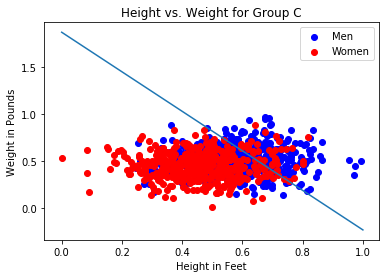

In [49]:
plotGraph(train, weights, "C")

Error: 36.2207%


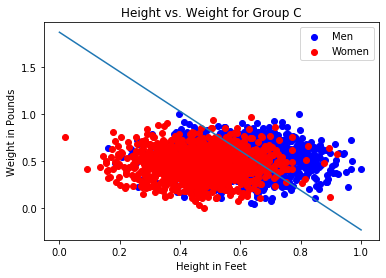

In [50]:
plotGraph(test, weights, "C")